### Q-1. 
Imagine you have a dataset where you have different Instagram features
like username , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is
to predict the number of likes and Time Since posted and the rest of the features are
your input features. Now you have to build a model which can predict the
number of likes and Time Since posted.

Dataset: https://www.kaggle.com/datasets/rxsraghavagrawal/instagram-reach?resource=download

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
df = pd.read_csv(r"D:\DATA SCIENCE\FSDS - May 22\Ineuron_Placement_Assessment\3. ML\instagram_reach.csv")

In [4]:
# Display records of the data
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [5]:
# Check info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [6]:
# Removing Unnecessary columns From Dataset
df2 = df.copy()
df2.drop(['Unnamed: 0','S.No'],inplace = True,axis=1)

In [7]:
# Checking first 5 rows after dropping
df2.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [8]:
# Checking last 5 rows after dropping
df2.tail()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
95,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222
99,palmariusdev,Obtén tu tienda en línea ahora.,741,#marketing #programming#development #desarroll...,3 hours,109


In [9]:
# Checking shape of the data
df2.shape

(100, 6)

In [10]:
# Checking null values
df2.isnull().sum()

USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

#### There are missing values in Caption column

In [11]:
# Only Caption column has missing values so we can drop that
df2 = df2.dropna()

In [12]:
# Check info
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           94 non-null     object
 1   Caption            94 non-null     object
 2   Followers          94 non-null     int64 
 3   Hashtags           94 non-null     object
 4   Time since posted  94 non-null     object
 5   Likes              94 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 5.1+ KB


In [13]:
# check shape after dropping na values
df2.shape

(94, 6)

In [14]:
# check missing values if any now
df2.isnull().sum()

USERNAME             0
Caption              0
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [15]:
df2['Time since posted'].value_counts()

2 hours     53
3 hours     18
4 hours     12
7 hours      3
11 hours     2
8 hours      1
9 hours      1
5 hours      1
20 hours     1
14 hours     1
24 hours     1
Name: Time since posted, dtype: int64

In [25]:
# Assigning and converting 'Time since posted' column into list
duration = list(df2["Time since posted"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:   # Check if duration contains only hour or mins
        if "hours" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  # Adds 0 minute
        else:
            duration[i] = "0hours " + duration[i]          # Adds 0 hour
            
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "hours")[0]))     # Extract hours from duration
    #duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))  # Extracts only minutes from duration 

In [26]:
# Adding duration_hours list to df2 dataframe

df2["Time_since_posted"] = duration_hours

In [27]:
df2.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes,Time_since_posted
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139,11
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23,2
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25,2
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49,3
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30,3


In [30]:
# Dropping unecessary column
df2.drop(['Time since posted'],inplace = True,axis=1)

In [31]:
df2.head()

,USERNAME,Caption,Followers,Hashtags,Likes,Time_since_posted
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,139,11
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,23,2
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,25,2
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,49,3
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,30,3


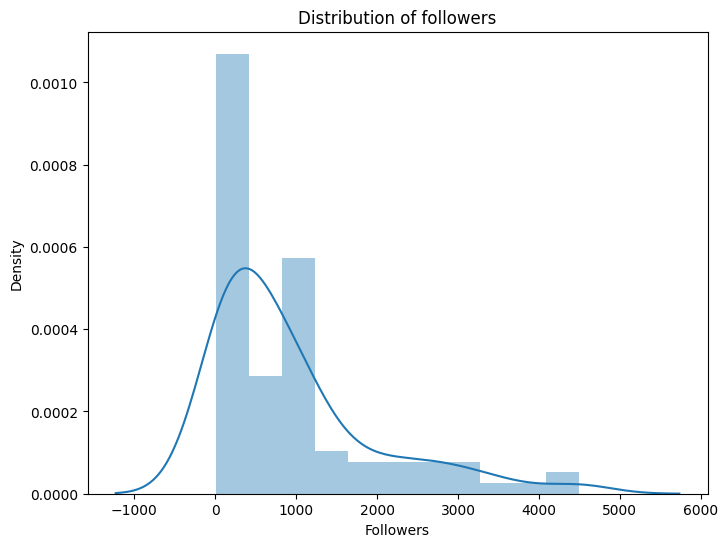

In [39]:
# Let's check distribution for Followers column
plt.figure(figsize=(8, 6))
sns.distplot(df2['Followers'])
plt.title("Distribution of followers")
plt.show()

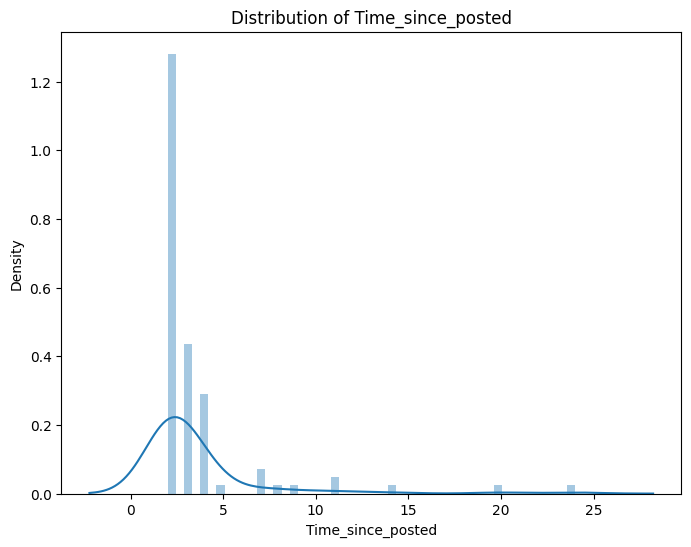

In [40]:
# Let's check distribution for Time_since_posted column
plt.figure(figsize=(8, 6))
sns.distplot(df2['Time_since_posted'])
plt.title("Distribution of Time_since_posted")
plt.show()

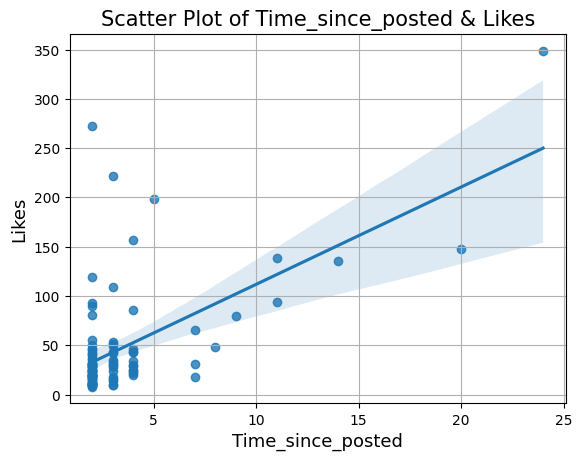

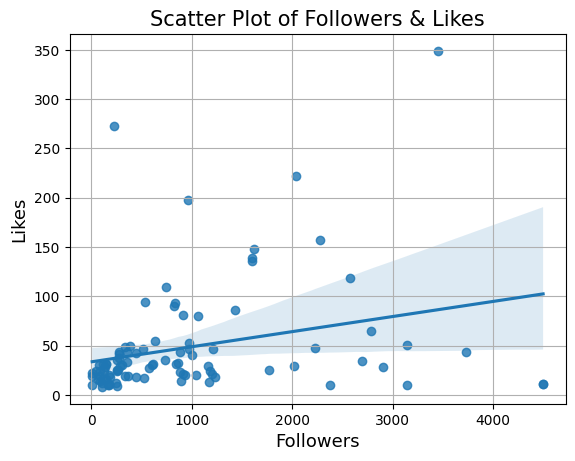

In [44]:
# Let's check relationship between Time_since_posted and Likes and in between Followers and Likes
x_axis = ['Time_since_posted','Followers']
y = "Likes"

for col in x_axis:
    sns.regplot(x = col, y = y, data = df2)
    plt.xlabel(col, fontsize = 13)
    plt.ylabel(y, fontsize = 13)
    plt.title("Scatter Plot of " + col + " & " + y, fontsize = 15)
    plt.grid()
    plt.show()

#### There is some Linear relationship between these variables 

<Axes: >

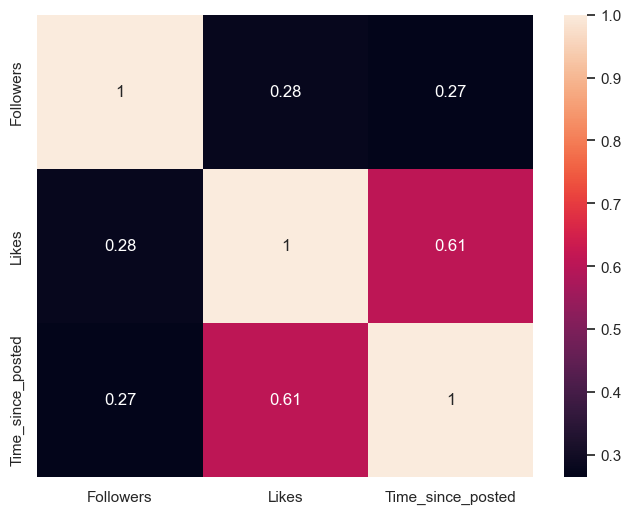

In [46]:
# Let's check Correlation using Heatmap between these variables
sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(df2.corr(),annot=True)

#### Clearly there is strong correlation between Likes and Time_since_posted column

In [48]:
df2.describe()

,Followers,Likes,Time_since_posted
count,94.000000,94.000000,94.000000
mean,942.627660,47.882979,3.521277
std,1023.894946,56.501757,3.488009
min,11.000000,8.000000,2.000000
25%,231.000000,19.000000,2.000000
50%,593.500000,29.500000,2.000000
75%,1177.000000,46.000000,3.000000
max,4496.000000,349.000000,24.000000


In [49]:
df2.describe(include='object')

,USERNAME,Caption,Hashtags
count,94,94,94
unique,90,94,92
top,mikequindazzi,Who are #DataScientist and what do they do? >>...,#DeepLearning #MachineLearning#ArtificialIntel...
freq,4,1,2


In [58]:
# Split the data into X & y
X = df2[['Followers']]
y = df2[['Time_since_posted','Likes']]

In [59]:
X.head()

,Followers
0,1600
1,880
2,255
3,340
4,304


In [60]:
y.head()

,Time_since_posted,Likes
0,11,139
1,2,23
2,2,25
3,3,49
4,3,30


In [61]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.20, random_state = 42)

In [62]:
X_train.shape , y_train.shape

((75, 1), (75, 2))

In [63]:
X_test.shape, y_test.shape

((19, 1), (19, 2))

In [64]:
# Standardize or feature scaling the datasets
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [65]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
# Apply Linear Regression
from sklearn.linear_model import LinearRegression

In [67]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [71]:
# Prediction for the test data
reg_pred=regression.predict(X_test)

In [72]:
reg_pred

array([[ 2.70490808, 39.16448004],
       [ 3.3948479 , 49.10770847],
       [ 2.94458067, 42.61857727],
       [ 4.74476847, 68.56240317],
       [ 3.88741031, 56.20638623],
       [ 2.71107613, 39.25337225],
       [ 3.88741031, 56.20638623],
       [ 3.36136424, 48.62515077],
       [ 2.60886282, 37.78030137],
       [ 2.5815472 , 37.38663588],
       [ 3.49794236, 50.59347823],
       [ 3.50675385, 50.7204671 ],
       [ 2.87408873, 41.60266632],
       [ 2.53572744, 36.72629376],
       [ 3.41247089, 49.36168621],
       [ 2.74544095, 39.74862884],
       [ 2.54365778, 36.84058374],
       [ 2.72341222, 39.43115667],
       [ 3.30144609, 47.76162646]])

In [74]:
residuals=y_test-reg_pred

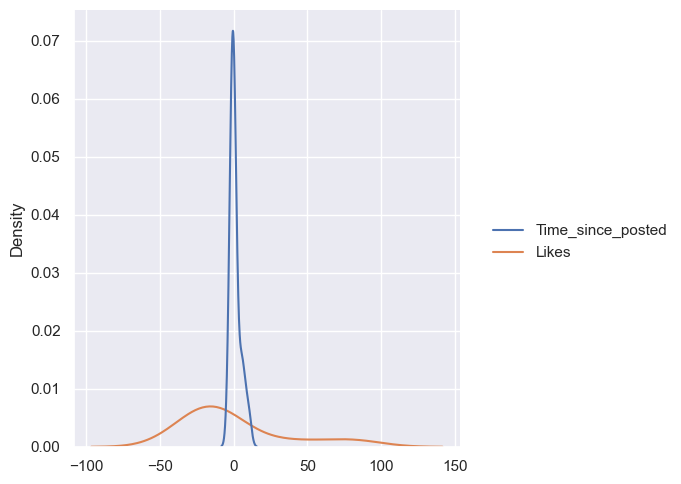

In [75]:
sns.displot(residuals,kind='kde')

In [78]:
# Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('Mean Squared Error is {}'.format(mean_squared_error(y_test,reg_pred)))
print('Mean Absolute Error is {}'.format(mean_absolute_error(y_test,reg_pred)))
print('Root Mean Squared Error is {}'.format(np.sqrt(mean_squared_error(y_test,reg_pred))))

Mean Squared Error is 597.078904863113
Mean Absolute Error is 14.102223177328954
Root Mean Squared Error is 24.435198072925726


In [79]:
# R Square
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.11877439519606131


In [81]:
# Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.06693759491347673